Classify the email using the binary classification method. Email Spam detection has two
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and
Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/*email*-spam-classification-dataset-csv


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
import seaborn as sns


In [3]:
df=pd.read_csv('emails.csv')
print(df.head(5))
print(df.tail(5))

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
       Email No.  the  to  ect  and  for  of    a  you  hou  .

In [4]:
# Checking for null data. It seems that there is none.
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
df.corr(method='pearson')

<ipython-input-5-432dd9d4238b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
the,1.000000,0.852715,0.337249,0.841200,0.784112,0.796397,0.784451,0.471392,0.303621,0.845670,...,0.008926,0.075479,0.225586,0.223426,0.101768,0.129466,0.127019,0.341878,0.051021,-0.004421
to,0.852715,1.000000,0.375480,0.825474,0.781971,0.752722,0.896466,0.508513,0.347993,0.881759,...,0.013250,0.101247,0.232847,0.255793,0.093322,0.091639,0.120059,0.406666,0.071388,0.055277
ect,0.337249,0.375480,1.000000,0.272863,0.369777,0.178028,0.400009,0.155783,0.974152,0.298387,...,0.134339,0.031431,0.046080,0.061550,0.004393,-0.007690,0.004368,0.141460,0.002492,-0.120782
and,0.841200,0.825474,0.272863,1.000000,0.751287,0.809665,0.815196,0.476764,0.235953,0.874276,...,0.005151,0.104454,0.272963,0.253440,0.151980,0.084147,0.124766,0.400225,0.042484,0.114364
for,0.784112,0.781971,0.369777,0.751287,1.000000,0.681457,0.744098,0.495852,0.329051,0.762659,...,0.022168,0.041775,0.236213,0.213631,0.134469,0.067151,0.121057,0.301074,0.038126,-0.003101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
military,0.129466,0.091639,-0.007690,0.084147,0.067151,0.073004,0.111685,0.006498,0.005429,0.120620,...,-0.002249,-0.002979,0.043408,0.104297,0.041300,1.000000,0.055227,0.049524,0.010835,0.064850
allowing,0.127019,0.120059,0.004368,0.124766,0.121057,0.108786,0.105358,0.082757,-0.000966,0.138099,...,-0.002675,-0.003543,-0.005130,0.018550,0.276001,0.055227,1.000000,0.096212,-0.003995,0.011279
ff,0.341878,0.406666,0.141460,0.400225,0.301074,0.444252,0.464473,0.195058,0.114210,0.448303,...,0.005403,0.073690,0.130356,0.164296,0.114092,0.049524,0.096212,1.000000,0.049690,0.135479
dry,0.051021,0.071388,0.002492,0.042484,0.038126,0.026403,0.093822,0.028883,0.000601,0.077751,...,-0.003373,0.035028,-0.006468,0.018939,-0.003137,0.010835,-0.003995,0.049690,1.000000,-0.006260


Visualizing ratio Ham/Spam:



<function matplotlib.pyplot.show(close=None, block=None)>

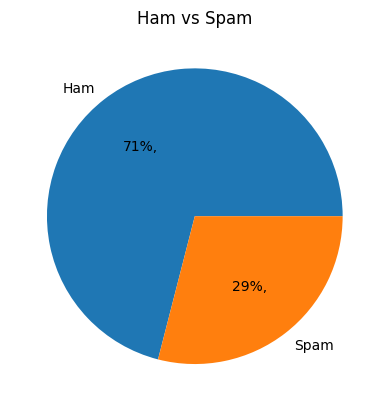

In [6]:
import matplotlib.pyplot as plt
print("Visualizing ratio Ham/Spam:\n")
count_Class = pd.value_counts(df['Prediction'], sort=True)
# print(count_Class)
count_Class.plot(kind = 'pie',labels=['Ham','Spam'], autopct='%1.0f%%,')
plt.title('Ham vs Spam')
plt.ylabel('')
plt.show

In [7]:
# Splitting dataframe into features and target.
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1].values
print(X.shape)
print(Y.shape)

(5172, 3000)
(5172,)


In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


## Naive Bayes

              precision    recall  f1-score   support

         Ham       0.98      0.95      0.97       739
        Spam       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.94      1035
weighted avg       0.96      0.95      0.95      1035

Accuracy score for Naive Bayes: 0.9536231884057971


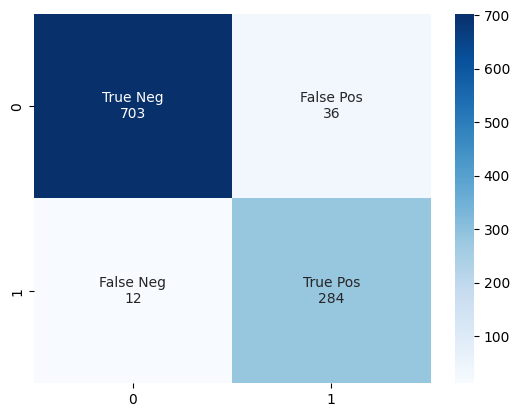

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Splitting dataframe into features and target.
X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1].values

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and train the Multinomial Naive Bayes model
mnb = MultinomialNB(alpha=1.9)
mnb.fit(train_x, train_y)
y_predNB = mnb.predict(test_x)
target_labels = ['Ham', 'Spam']

# Print classification report
print(classification_report(test_y, y_predNB, target_names=target_labels))

# Print accuracy score
print("Accuracy score for Naive Bayes:", accuracy_score(test_y, y_predNB))

# Create a confusion matrix
cm = confusion_matrix(test_y, y_predNB)

# Define group names and counts for annotation
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()


## K-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [15]:
KNclassifier = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)
KNclassifier.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=2)

## Support vector machines (SVMs)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [20]:
SVC_classifier = SVC(kernel='poly', gamma='auto', degree=3)
SVC_classifier.fit(train_x, train_y)


SVC(gamma='auto', kernel='poly')

In [21]:
accuracy = SVC_classifier.score(test_x, test_y)
print("Accuracy score for SVC:", accuracy)

Accuracy score for SVC: 0.8927536231884058


In [22]:
y_pred_SVC = SVC_classifier.predict(test_x)

In [23]:
classification_report_SVC = classification_report(test_y, y_pred_SVC, target_names=target_labels)


In [24]:
print(classification_report_SVC)

              precision    recall  f1-score   support

         Ham       0.89      0.97      0.93       739
        Spam       0.90      0.70      0.79       296

    accuracy                           0.89      1035
   macro avg       0.90      0.83      0.86      1035
weighted avg       0.89      0.89      0.89      1035

